# Proyek Klasifikasi Gambar:Tom & Jerry Classification
- **Nama:** Andi Engku Putribuana
- **Email:** andiengku1922@gmail.com
- **ID Dicoding:** putribuana

## Import Semua Packages/Library yang Digunakan

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 75 Nov 12 11:55 kaggle.json


In [3]:
#!/bin/bash
!kaggle datasets download balabaskar/tom-and-jerry-image-classification

Dataset URL: https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification
License(s): CC0-1.0
 97% 424M/435M [00:05<00:00, 65.6MB/s]
100% 435M/435M [00:05<00:00, 77.7MB/s]


In [4]:
import zipfile

zip_path = '/content/tom-and-jerry-image-classification.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('dataset/')
zip_ref.close()

## Data Preparation

### Data Loading

In [19]:
IMAGE_PATH = '/content/dataset/tom_and_jerry/tom_and_jerry'
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 4
TARGET_ACCURACY = 0.90


Folder: jerry
  - Gambar: frame3517.jpg, Resolusi: 854 x 480


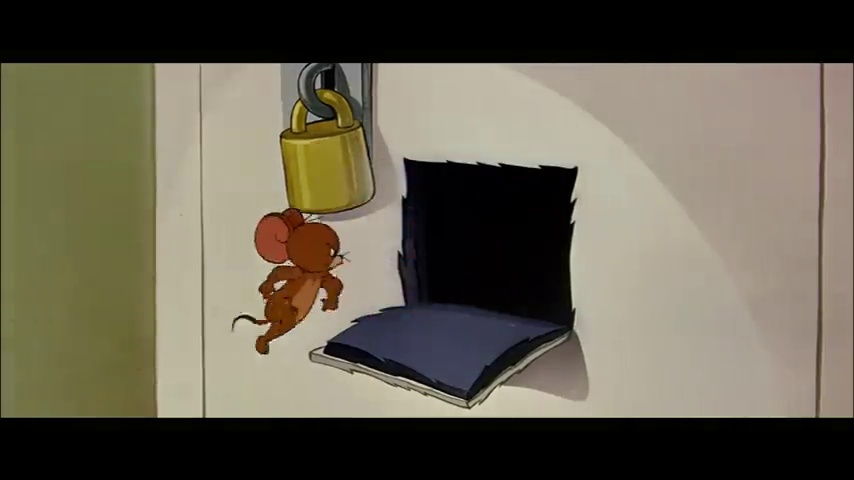


Folder: tom_jerry_0
  - Gambar: frame631.jpg, Resolusi: 1280 x 720


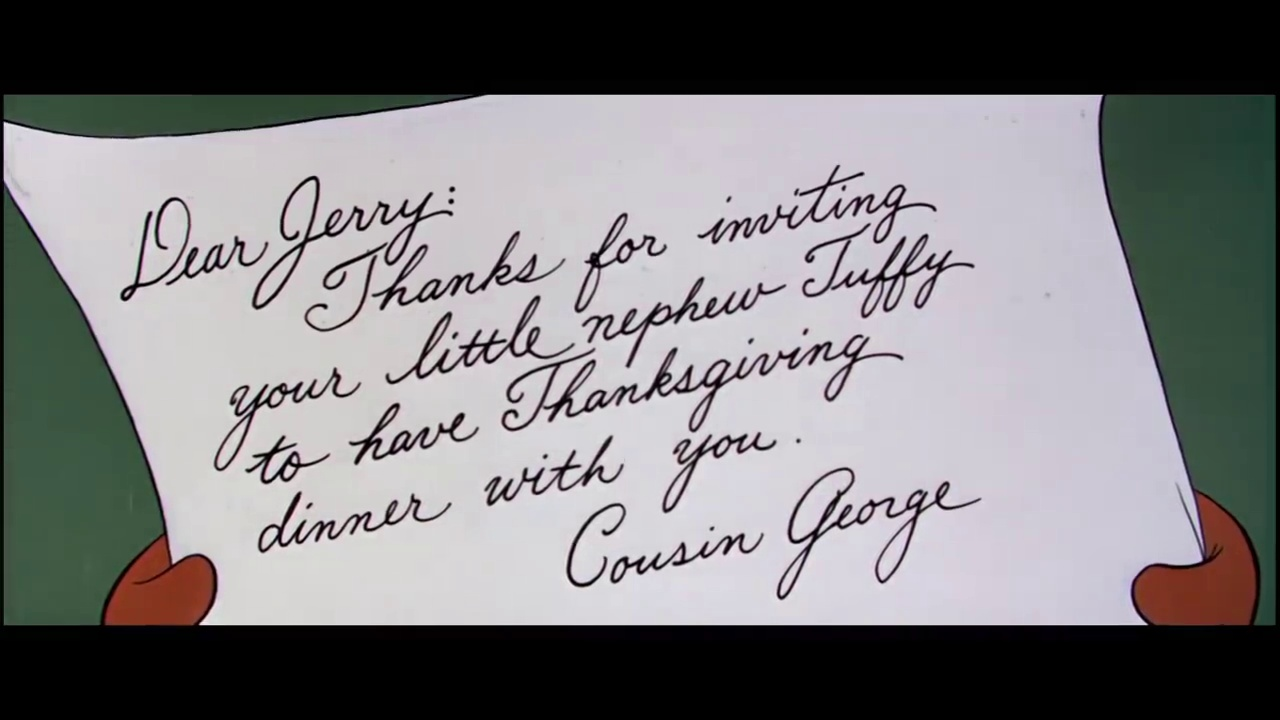


Folder: tom
  - Gambar: frame151.jpg, Resolusi: 1280 x 720


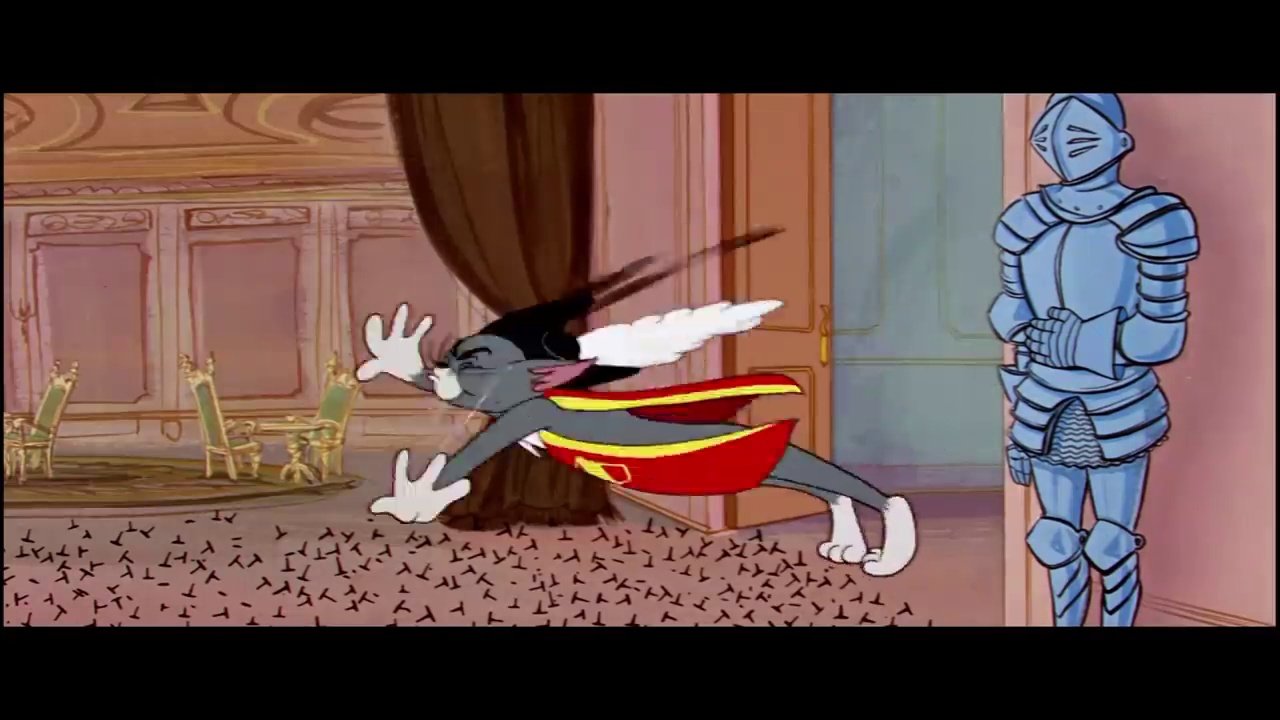


Folder: tom_jerry_1
  - Gambar: frame3538.jpg, Resolusi: 854 x 480


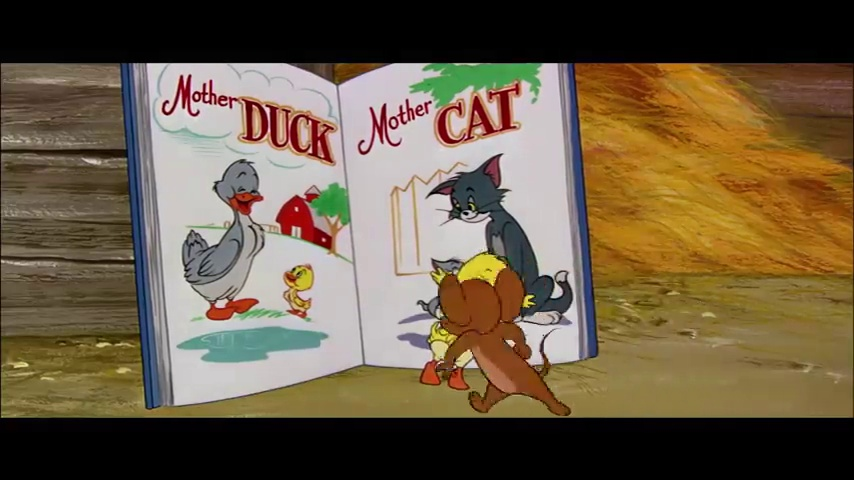

In [6]:
# Loop melalui setiap folder di dalam direktori dataset
for folder_name in os.listdir(IMAGE_PATH):
    folder_path = os.path.join(IMAGE_PATH, folder_name)

    # Memastikan folder_path adalah sebuah direktori
    if os.path.isdir(folder_path):
        print(f"\nFolder: {folder_name}")

        # Mengambil sampel 1 gambar dari setiap folder
        sample_images = os.listdir(folder_path)[:1]

        for image_name in sample_images:
            image_path = os.path.join(folder_path, image_name)

            try:
                # Membuka gambar menggunakan PIL
                with Image.open(image_path) as img:
                    width, height = img.size
                    print(f"  - Gambar: {image_name}, Resolusi: {width} x {height}")
                    img_resized = img.resize((300, 300))
                    display(img)

            except Exception as e:
                print(f"  - Tidak dapat membuka gambar {image_name}: {e}")


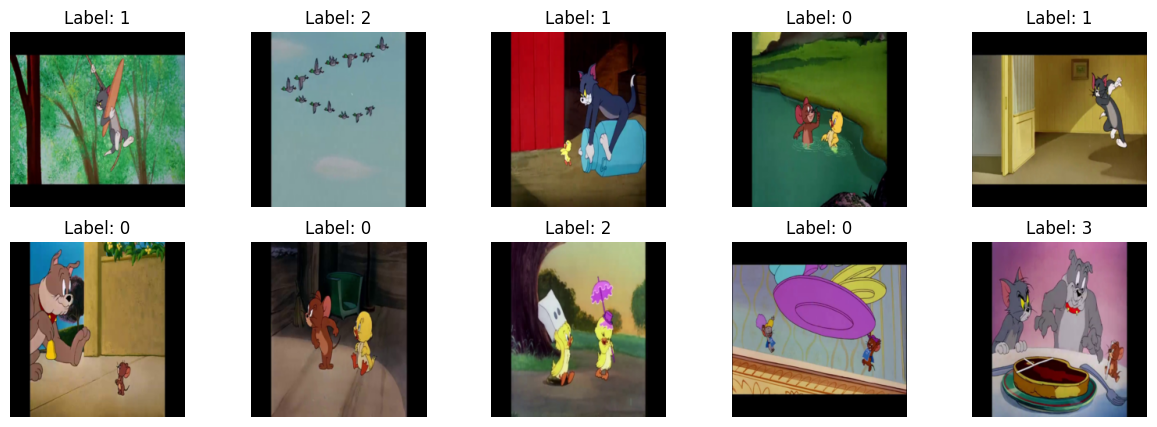

In [7]:
# Transformasi untuk preprocessing data gambar
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor()
])

# Load dataset dari directory
dataset = datasets.ImageFolder(root=IMAGE_PATH, transform=transform)

# Membuat DataLoader untuk batch processing
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Ambil batch pertama dari train_loader
images, labels = next(iter(train_loader))

# Plot 12 gambar pertama
plt.figure(figsize=(15, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)

    image_np = images[i].permute(1, 2, 0).numpy()

    # Plot gambar
    plt.imshow(image_np)
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("off")  # Menonaktifkan sumbu

plt.show()

Total Gambar per Kelas:
jerry: 1240 gambar
tom: 1930 gambar
tom_jerry_0: 1528 gambar
tom_jerry_1: 780 gambar


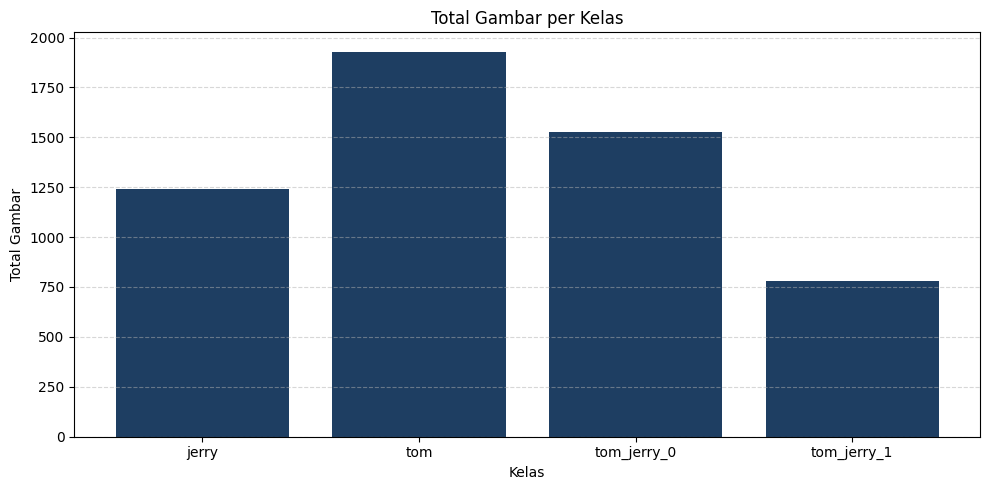

In [8]:
from collections import Counter

# Menghitung total gambar per kelas dari dataset yang sudah dimuat dengan ImageFolder
class_names = dataset.classes
class_indices = dataset.targets

# Menggunakan Counter untuk menghitung jumlah gambar per kelas
total_images_per_class = Counter(class_indices)

# Mengonversi indeks ke nama kelas
total_images_per_class = {class_names[i]: count for i, count in total_images_per_class.items()}

# Mencetak total gambar per kelas
print("Total Gambar per Kelas:")
for class_name, total_images in total_images_per_class.items():
    print(f"{class_name}: {total_images} gambar")

# Menampilkan data dalam bentuk grafik
plt.figure(figsize=(10, 5))
plt.bar(total_images_per_class.keys(), total_images_per_class.values(), color='#1E3E62')
plt.xlabel('Kelas')
plt.ylabel('Total Gambar')
plt.title('Total Gambar per Kelas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Total Gambar per Kelas:
jerry: 1240 gambar
tom: 1930 gambar


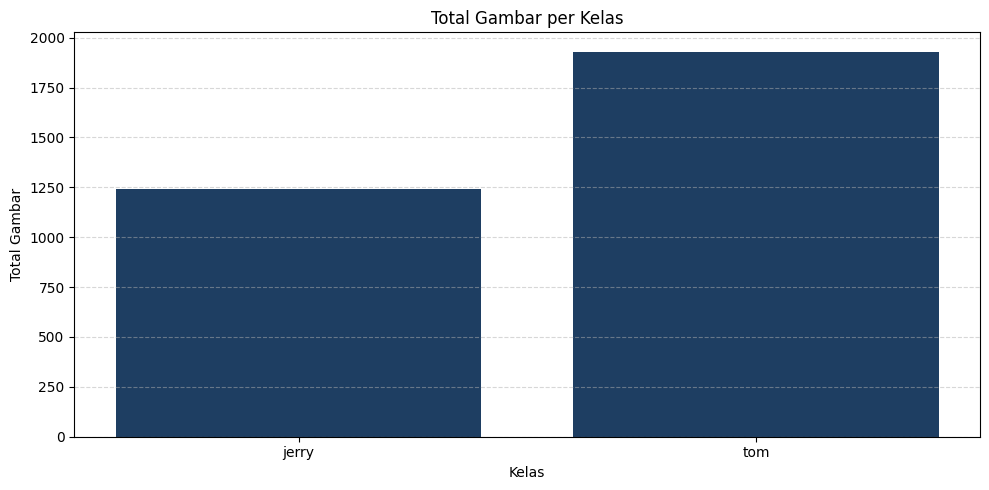

In [9]:
from collections import Counter

#ubah label jadi 2 kelas saja
target_classes = ['jerry', 'tom']

# Memfilter dataset agar hanya berisi kelas "jerry" dan "tom"
filtered_indices = [i for i, class_name in enumerate(dataset.classes) if class_name in target_classes]
filtered_dataset = [(img, label) for img, label in zip(dataset.samples, dataset.targets) if label in filtered_indices]

# Memperbarui nama kelas dan indeks setelah pemangkasan
class_names = [dataset.classes[i] for i in filtered_indices]
class_indices = [label for _, label in filtered_dataset]

# Menggunakan Counter untuk menghitung jumlah gambar per kelas
total_images_per_class = Counter(class_indices)

# Mengonversi indeks ke nama kelas
total_images_per_class = {class_names[i]: count for i, count in total_images_per_class.items()}

# Mencetak total gambar per kelas
print("Total Gambar per Kelas:")
for class_name, total_images in total_images_per_class.items():
    print(f"{class_name}: {total_images} gambar")

# Menampilkan data dalam bentuk grafik
plt.figure(figsize=(10, 5))
plt.bar(total_images_per_class.keys(), total_images_per_class.values(), color='#1E3E62')
plt.xlabel('Kelas')
plt.ylabel('Total Gambar')
plt.title('Total Gambar per Kelas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Data Preprocessing

#### Split Dataset

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation dengan pembagian 80-20
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

target_classes = ['jerry', 'tom']

# Data Generator untuk Training
train_generator = datagen.flow_from_directory(
    IMAGE_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    classes=target_classes,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Data Generator untuk Validation
validation_generator = datagen.flow_from_directory(
    IMAGE_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    classes=target_classes,
    class_mode='binary',  # Ubah ke binary
    subset='validation',
    shuffle=False
)

Found 2536 images belonging to 2 classes.
Found 634 images belonging to 2 classes.


## Modelling

In [11]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

base_model = MobileNet(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Membangun model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Evaluasi dan Visualisasi

In [20]:
# Custom Callback untuk target akurasi
class TargetCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        accuracy = logs.get('accuracy', 0)
        val_accuracy = logs.get('val_accuracy', 0)

        if accuracy >= TARGET_ACCURACY and val_accuracy >= TARGET_ACCURACY:
            print(f"\nEpoch {epoch + 1}: Accuracy dan val_accuracy >= {TARGET_ACCURACY:.2%}. Training dihentikan.")
            self.model.stop_training = True

# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

target_callback = TargetCallback()

In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping, target_callback]
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.9405 - loss: 0.1481 - val_accuracy: 0.8754 - val_loss: 0.3834 - learning_rate: 0.0010
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9485 - loss: 0.1476 - val_accuracy: 0.8470 - val_loss: 0.4989 - learning_rate: 0.0010
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9591 - loss: 0.1050
Epoch 3: Accuracy dan val_accuracy >= 90.00%. Training dihentikan.
80/80 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.9590 - loss: 0.1051 - val_accuracy: 0.9054 - val_loss: 0.2776 - learning_rate: 0.0010


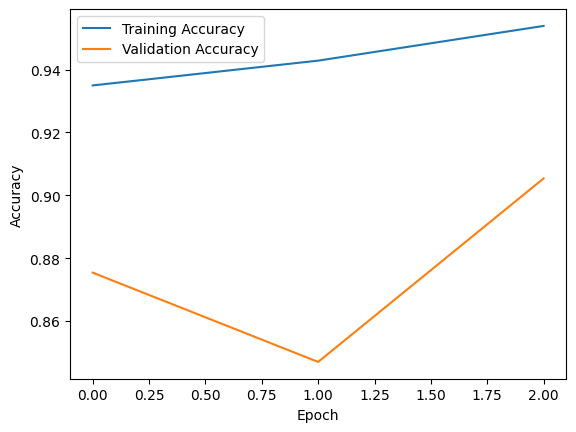

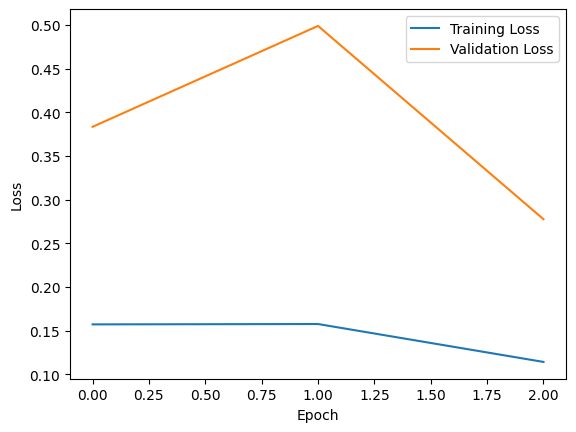

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Konversi Model

### 1. Saved Model

In [27]:
model.export("exported_model")

Saved artifact at 'exported_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor_97')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133177247759552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133177247758496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133177227151664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133177227149552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133177227151136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133177227149904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133177227155360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133177227157648: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [28]:
reloaded_artifact = tf.saved_model.load("exported_model")

### 2. TF Lite

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

### 3. TF JS

In [34]:
!pip install tensorflowjs

In [36]:
!pip install --upgrade tensorflowjs

In [46]:
pip install tensorflow tensorflowjs --upgrade

In [54]:
!tensorflowjs_converter --input_format=keras /content/content/model.h5 /content/tfjs_model

2024-11-12 13:13:07.061270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731417187.105473   19465 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731417187.118375   19465 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


## Inference (Optional)